# PMT response

reconstruction biased through: field inhomogeneities, impurities in LXe, light collection efficiency and non-functioning PMTs

for XENON1T Kr-83m and Xe-131m data-driven corrections for 3-dim position of interaction (see arXiv:1906.04717)

what we can easily ckeck ourselves, is whether some PMTs are non-functioning

In [1]:
import Zip
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import time
import math

# Channels in the detector
det_ch = { 'tpc': list(range(0, 247+1)), 'veto': list(range(248, 253+1)), 
          'sum_wv': [254], 'busy_on': [255], 'busy_off': [256],
          'hev_on': [257], 'hev_off': [258], 'muon_veto_trigger': [259], } 
n_channels = 260

# The data files
NG = Zip.ReadZipped("/data/nikhefproject/data/xenon1t/NG") # Neutron data
Rn220 = Zip.ReadZipped("/data/nikhefproject/data/xenon1t/Rn220") # Rn-220 data

[34, 118, 134, 239, 257, 258, 259]


Text(0.5,0,'channel')

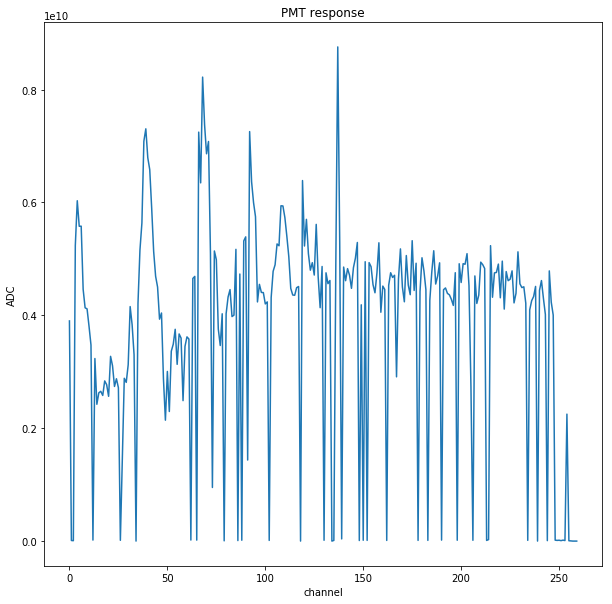

In [23]:
baseline = 16382
#list with summed adc value over multiple events for each channel
adc_sum = [0]*n_channels
#list for channels that showed no signal
responselist=[]

# looping over events
for i in range(1000):
    event = NG.get_single_event(i)
    
    #Loop over all pulses in the event
    for p in event.pulses:
        ch = p.channel
        
        for adc in p.raw_data:
            #summing all adc values for one PMT (any value that differ from baseline, so noise as well)
            adc_sum[ch]  = (adc_sum[ch] + abs(baseline - adc)) 
    
for val in range(len(adc_sum)):
    if adc_sum[val]==0:
        responselist.append(val)
print(responselist)  
#result for 1000 events: [34, 118, 134, 239, 257, 258, 259]

    
%matplotlib inline
figs, ax = plt.subplots()
figs.set_size_inches(10,10)
ax.plot(adc_sum)
ax.set_title('PMT response')
ax.set_ylabel("ADC")
ax.set_xlabel("channel")   

In [25]:
fname = 'PMTresponse1000'+ 'NG' + '.png' #change 'NG', 'Rn' accordingly
figs.savefig(fname, dpi = (200))     

In [28]:
#let's see which PMTs have a response lower than 5% of highest
responselist2 = []
for val in range(len(adc_sum)):
    if adc_sum[val]<500000000: #5% of 1e10 for 1000 events
        responselist2.append(val)
print(responselist2)

[1, 2, 12, 26, 34, 62, 65, 79, 86, 88, 102, 118, 130, 134, 135, 139, 148, 150, 152, 162, 178, 183, 190, 198, 206, 213, 214, 234, 239, 244, 248, 249, 250, 251, 252, 253, 255, 256, 257, 258, 259]


result for 1000 evnts:

[1, 2, 12, 26, 34, 62, 65, 79, 86, 88, 102, 118, 130, 134, 135, 139, 148, 150, 152, 162, 178, 183, 190, 198, 206, 213, 214, 234, 239, 244, 248, 249, 250, 251, 252, 253, 255, 256, 257, 258, 259]